<a href="https://colab.research.google.com/github/Wendell-Silva/DecisionTree/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores de Decisão: Classificação

In [ ]:
# Pacotes de manipulação de dados
import pandas as pd
import numpy as np

# Pacores Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# Módulo de Análise Exploratória
import aed

In [ ]:
df_rh = pd.read_csv('base_rh.csv')

In [ ]:
df_rh.head()

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2


In [ ]:
df_rh.Freq_Viagens.unique()

array(['Viaja raramente', 'Viaja frequentemente', 'Não viaja'],
      dtype=object)

In [ ]:
df_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Funcionario_Deixou_Empresa  1470 non-null   object
 1   Freq_Viagens                1470 non-null   object
 2   Formacao                    1470 non-null   object
 3   Estado_Civil                1470 non-null   object
 4   Faz_hora_extras             1470 non-null   object
 5   Equilibrio_de_Vida          1470 non-null   object
 6   Idade                       1470 non-null   int64 
 7   Tempo_de_empresa            1470 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 92.0+ KB


In [ ]:
df_rh.describe(include=object).T.round(2)

,count,unique,top,freq
Funcionario_Deixou_Empresa,1470,2,Não,1233
Freq_Viagens,1470,3,Viaja raramente,1043
Formacao,1470,5,Ensino Superior,572
Estado_Civil,1470,3,Casado,673
Faz_hora_extras,1470,2,Não,1054
Equilibrio_de_Vida,1470,4,Muito bom,893


In [ ]:
df_rh.isnull().sum()

Funcionario_Deixou_Empresa    0
Freq_Viagens                  0
Formacao                      0
Estado_Civil                  0
Faz_hora_extras               0
Equilibrio_de_Vida            0
Idade                         0
Tempo_de_empresa              0
dtype: int64

In [ ]:
df_rh.duplicated().sum()

33

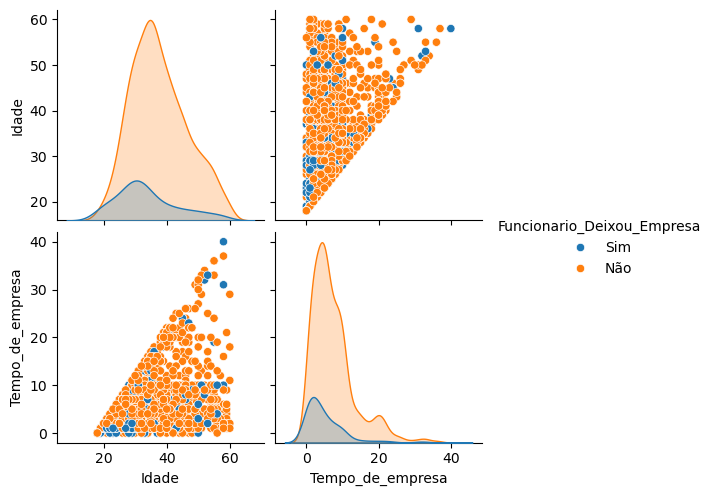

In [ ]:
# Dispersão por Classe

sns.pairplot(df_rh, hue='Funcionario_Deixou_Empresa')

In [ ]:
df_rh['Target'] = np.where(df_rh['Funcionario_Deixou_Empresa'] == 'Sim', 1, 0)

In [ ]:
df_rh

,Funcionario_Deixou_Empresa,Freq_Viagens,Formacao,Estado_Civil,Faz_hora_extras,Equilibrio_de_Vida,Idade,Tempo_de_empresa,Target
0,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Ruim,41,6,1
1,Não,Viaja frequentemente,Ensino Médio,Casado,Não,Muito bom,49,10,0
2,Sim,Viaja raramente,Ensino Técnico,Solteiro,Sim,Muito bom,37,0,1
3,Não,Viaja frequentemente,Mestrado,Casado,Sim,Muito bom,33,8,0
4,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,27,2,0
...,...,...,...,...,...,...,...,...,...
1465,Não,Viaja frequentemente,Ensino Técnico,Casado,Não,Muito bom,36,5,0
1466,Não,Viaja raramente,Ensino Médio,Casado,Não,Muito bom,39,7,0
1467,Não,Viaja raramente,Ensino Superior,Casado,Sim,Muito bom,27,6,0
1468,Não,Viaja frequentemente,Ensino Superior,Casado,Não,Bom,49,9,0


In [ ]:
df_rh_iv = aed.analise_iv(df_rh, 'Target')
df_rh_iv.get_lista_iv()

C:\Mao_na_massa_2\aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[nome_var] = pd.qcut(df_num[var],
C:\Mao_na_massa_2\aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',
C:\Mao_na_massa_2\aed.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df2 = df_aux.pivot_table(values='target2',


Target,IV
Variavel,
Funcionario_Deixou_Empresa,9.21
Faz_hora_extras,0.40
Tempo_de_empresa,0.34
Idade,0.31
Estado_Civil,0.22
Freq_Viagens,0.13
Equilibrio_de_Vida,0.06
Formacao,0.01


In [ ]:
df_rh_iv.get_bivariada(var_escolhida='Faz_hora_extras')

==> "Faz_hora_extras" tem IV de 0.4


Target,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Faz_hora_extras,Não,110.0,944.0,1054.0,71.7,46.41,76.56,10.44,0.61,-0.49,0.15
1,Faz_hora_extras,Sim,127.0,289.0,416.0,28.3,53.59,23.44,30.53,2.29,0.83,0.25


# Desenvolvimento do Modelo: Árvore de Decisão

## Definição do Target e das Features

In [ ]:
# Criação das variáveis dummies
df_rh_modelo = pd.get_dummies(df_rh)
df_rh_modelo.head()

,Idade,Tempo_de_empresa,Target,Funcionario_Deixou_Empresa_Não,Funcionario_Deixou_Empresa_Sim,Freq_Viagens_Não viaja,Freq_Viagens_Viaja frequentemente,Freq_Viagens_Viaja raramente,Formacao_Doutorado,Formacao_Ensino Médio,...,Formacao_Mestrado,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Solteiro,Faz_hora_extras_Não,Faz_hora_extras_Sim,Equilibrio_de_Vida_Bom,Equilibrio_de_Vida_Excelente,Equilibrio_de_Vida_Muito bom,Equilibrio_de_Vida_Ruim
0,41,6,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,False,True
1,49,10,0,True,False,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
2,37,0,1,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
3,33,8,0,True,False,False,True,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,27,2,0,True,False,False,False,True,False,True,...,False,True,False,False,True,False,False,False,True,False


In [ ]:
# Target (Variável Resposta)
y = df_rh_modelo['Target']

# Feature (Variável explicativa)
x = df_rh_modelo.drop(['Target', 'Funcionario_Deixou_Empresa_Não', 'Funcionario_Deixou_Empresa_Sim'], axis=1)

In [ ]:
# Treinamento do Modelo de Árvore de Decisão

modelo_turnover = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_turnover.fit(x, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

Text(0.5, 1.0, 'Estimativa de Turnover\n Utilizando Árvore de Decisão')

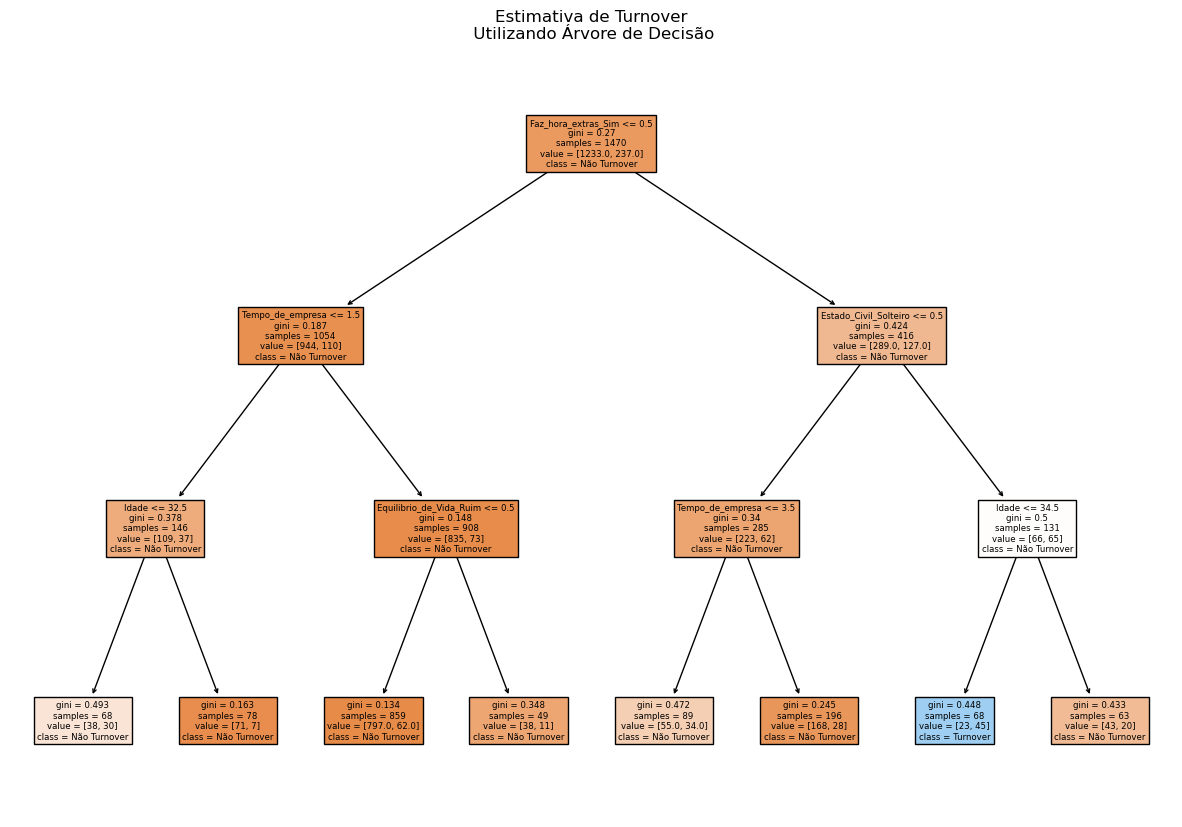

In [ ]:
# Interpretação do Modelo
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(modelo_turnover, feature_names=x.columns, class_names=['Não Turnover', 'Turnover'], filled=True)
plt.title('Estimativa de Turnover\n Utilizando Árvore de Decisão')